# Women Developers

## Import Data and Libraries

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [17]:
df_2018 = pd.read_csv('./dataset/survey_results_public_2018.csv')
df_2019 = pd.read_csv('./dataset/survey_results_public_2019.csv')
df_2020 = pd.read_csv('./dataset/survey_results_public_2020.csv')

c:\Users\ekaap\OneDrive\Documents\Career\Skill Up\Udacity\Projects\Project 1\stackoverflow-survey-2020\venv\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Business Understanding

Diversity in tech company is important, including **gender** diversity. In order to understand demography of women developers using StackOverflow Developers Survey data, the relevant question are as follows:

### How is the comparison between men and women developers in the last 3 years?

Now let's start with the question.

## Data Understanding and Preparation

In [18]:
df_2020['Gender'].isnull().mean()

0.21569631249903043

Around 22% of respondents didn't answer the Gender question. For this analysis, we are ignoring the missing values as it will not contribute to the result.

In [19]:
df_2020['Gender'].value_counts()

Man                                                            46013
Woman                                                           3844
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         76
Woman;Man;Non-binary, genderqueer, or gender non-conforming       26
Name: Gender, dtype: int64

Here we only see the ones who define their gender in binary to avoid confusion. Now we prepare the dataset to be analysed.

In [20]:
def get_gender_count(df):
    return df['Gender'][(df['Gender']=='Man') | (df['Gender']=='Woman')].value_counts()

def get_gender_count_2018(df):
    df = df.replace({'Gender': {'Male': 'Man', 'Female': 'Woman'}})
    return df['Gender'][(df['Gender']=='Man') | (df['Gender']=='Woman')].value_counts()

    return data

gender_2020 = get_gender_count(df_2020)
gender_2019 = get_gender_count(df_2019)
gender_2018 = get_gender_count_2018(df_2018)

gender = pd.concat([gender_2020, gender_2019, gender_2018], ignore_index=True, axis=1)
gender = gender.transpose()
gender['Year'] = pd.DataFrame(['2020', '2019', '2018'])
gender

,Man,Woman,Year
0,46013,3844,2020
1,77919,6344,2019
2,59458,4025,2018


## Data Analysis

We will see the comparison result of men and women developers in the last 3 years.

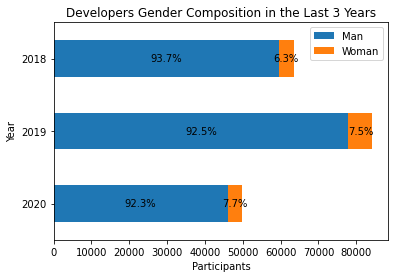

In [21]:
gender.plot(
    x = 'Year',
    kind = 'barh',
    stacked = True,
    title = 'Developers Gender Composition in the Last 3 Years',
    mark_right = True)

df_total = gender["Man"] + gender["Woman"]
df_rel = gender[gender.columns[0:2]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(gender.iloc[:, 0:2].cumsum(1)[n], 
                                         gender[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')
        plt.xlabel("Participants")

From the chart we can see that the percentage of women developers against men always increased from 2018 to 2020, although the composition is not much changing.

## Results

We can conclude that **the composition of men and women developers is not much changing in the last 3 years**, but we can see that **the perentage of women developers are increasing year on year**. This is a good sign for gender diversity in tech!